# Code for Q1 - PCA

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = np.loadtxt('hw3pca.txt')

In [3]:
train, test = train_test_split(data, test_size = 0.2)

In [4]:
def dimensionReduction(train, test):
    error_train = []
    error_test = []
    
    for n_comp in np.arange(1,250, 1):
        pca_ = PCA(n_components = n_comp)
        
        #Perform PCA on data
        reduced_train = pca_.fit_transform(train)
        reduced_test = pca_.transform(test)
        
        #Reconstruct data
        reconstucted_train = pca_.inverse_transform(reduced_train)
        reconstucted_test = pca_.inverse_transform(reduced_test)
        
        #Reconstruction error
        reconstruction_error_train = np.sum(pow(np.sum(pow((train - reconstucted_train),2),axis = 1),0.5))
        reconstruction_error_test = np.sum(pow(np.sum(pow((test - reconstucted_test),2), axis = 1),0.5))
        
        error_train.append(reconstruction_error_train)
        error_test.append(reconstruction_error_test)
        
        explained_variance = pca_.explained_variance_ratio_
        
    return error_train, error_test, explained_variance

In [5]:
e_train, e_test, explained_variance = dimensionReduction(train, test)
e_train = np.asarray(e_train)/train.shape[0]
e_test = np.asarray(e_test)/test.shape[0]

In [6]:
plt.plot(np.arange(1,250, 1), e_train, 'b', label = "Train Error")
plt.plot(np.arange(1,250, 1), e_test, 'r', label = "Test Error")

plt.xlabel('Reduced Dimension')
plt.ylabel('Reconstruction Error')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Reconstruction Error Vs. Dimensions')

plt.show()

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


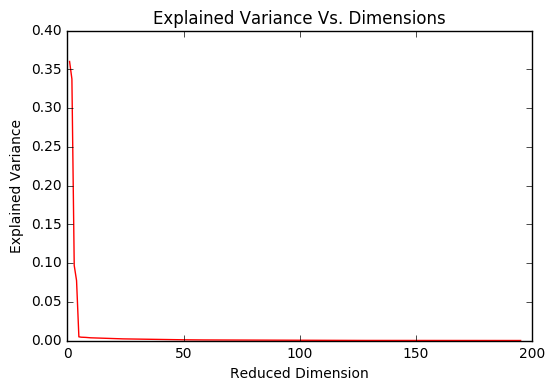

In [7]:
plt.plot(np.arange(1,train.shape[0]+1, 1), explained_variance, 'r')

plt.xlabel('Reduced Dimension')
plt.ylabel('Explained Variance')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Explained Variance Vs. Dimensions')

plt.show()